In [1]:
!pip install seaborn

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
country_geo = '../../datasets/geo/world-countries.json'
import folium
pd.set_option('display.max_row', 200)

# World Indicators Dataset exploration

#### In this data exploration we will be illustrating the concentration of endangered plant, animal, and bird species on a map of the globe, then determining what to make of any insights we discover in the process.

In [39]:
data = pd.read_csv('../../datasets/world-development-indicators/Indicators.csv')

In [40]:
data.shape

(5656458, 6)

In [41]:
data.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


## Let's find all of the threatened species

In [42]:
# Let's look at endangered species of plants and animals categorically one at a time
indicators = pd.DataFrame(data[data['IndicatorName'].str.contains('threatened')])
indicators.head() # Output looks reasonable

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5641696,Arab World,ARB,"Bird species, threatened",EN.BIR.THRD.NO,2015,297.0
5641702,Arab World,ARB,"Fish species, threatened",EN.FSH.THRD.NO,2015,572.0
5641712,Arab World,ARB,"Mammal species, threatened",EN.MAM.THRD.NO,2015,217.0
5641723,Arab World,ARB,"Plant species (higher), threatened",EN.HPT.THRD.NO,2015,318.0
5641741,Caribbean small states,CSS,"Bird species, threatened",EN.BIR.THRD.NO,2015,66.0


*Interesting, it appears that threatened species have only been counted in the year 2015, let's check to make sure*

In [43]:
indicators['Year'].unique()
# Suspicions confirmed, only one year worth of data is present so 
# we won't be able to look at changes over time

array([2015])

In [44]:
print(indicators['IndicatorName'].unique())

['Bird species, threatened' 'Fish species, threatened'
 'Mammal species, threatened' 'Plant species (higher), threatened']


## Let's examine the descriptive statistics for a general idea about how to interpret our data

In [45]:
# seperate the data out by species family
birds = pd.DataFrame(indicators[indicators['IndicatorName'].str.contains('Bird')])
fish = indicators[indicators['IndicatorName'].str.contains('Fish')]
mammals = indicators[indicators['IndicatorName'].str.contains('Mammal')]
plants = indicators[indicators['IndicatorName'].str.contains('Plant')]
threatened_species = [('Birds',birds),('Fish',fish),('Mammals',mammals),('Plants',plants)]
# print out for each category
for species in threatened_species:
    print(f"Species: {species[0]}")
    print(species[1]['Year'].unique())
    print("Count:",len(species[1]))
    print(species[1].describe(),'\n')
    

Species: Birds
[2015]
Count: 245
         Year        Value
count   245.0   245.000000
mean   2015.0   127.024490
std       0.0   431.160737
min    2015.0     0.000000
25%    2015.0     9.000000
50%    2015.0    15.000000
75%    2015.0    33.000000
max    2015.0  4393.000000 

Species: Fish
[2015]
Count: 245
         Year        Value
count   245.0   245.000000
mean   2015.0   226.983673
std       0.0   743.223517
min    2015.0     0.000000
25%    2015.0    14.000000
50%    2015.0    29.000000
75%    2015.0    62.000000
max    2015.0  7819.000000 

Species: Mammals
[2015]
Count: 245
         Year        Value
count   245.0   245.000000
mean   2015.0    98.791837
std       0.0   340.235299
min    2015.0     0.000000
25%    2015.0     4.000000
50%    2015.0    10.000000
75%    2015.0    30.000000
max    2015.0  3309.000000 

Species: Plants
[2015]
Count: 245
         Year         Value
count   245.0    245.000000
mean   2015.0    437.346939
std       0.0   1592.198678
min    2015.0      

### Assosciated histograms on a log scale
*Because the data has relatively large maximum outliers, plotting it on a log scale will help to show all of the data more effectively*

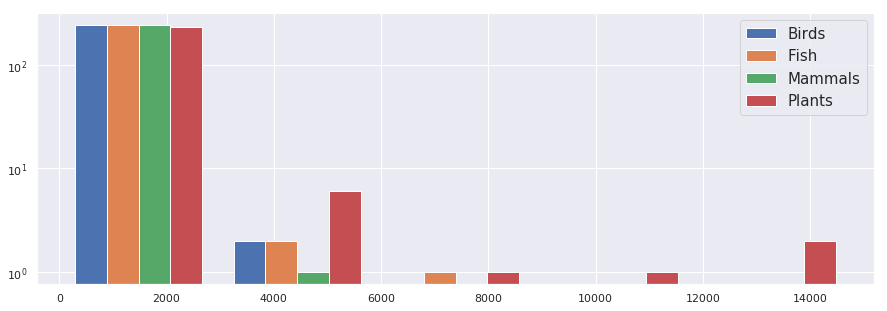

In [46]:
plt.rcParams["figure.figsize"] = (15,5)
# Now we can look at some log scale
x = [species[1]['Value'] for species in threatened_species]
#colors=['#FF3b00', '#FFF082', '#00A6ED','#34BF28']
plt.hist(x, histtype='bar',bins=5, label=[species[0] for species in threatened_species])
plt.legend(prop={'size':15})
plt.yscale('log')


### It looks like there are countries with large threatened species counts extending the tail. Let's explore which countries are facing the greatest challenges for species conservation
*Based on the histogram, I think I will set my cutoff around 2500, and inspect each category, this should identify about 20-30 high risk areas*

In [47]:
# Lets filter the whole threatened indicators database for these high risk countries
pertinent_indicators = indicators[indicators['Value']>1800]
pertinent_indicators.count()

CountryName      30
CountryCode      30
IndicatorName    30
IndicatorCode    30
Year             30
Value            30
dtype: int64

In [48]:
# Let's inspect these 20 "countries"
pertinent_indicators.sort_values(by=['Value'])
pertinent_indicators

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5641864,East Asia & Pacific (all income levels),EAS,"Plant species (higher), threatened",EN.HPT.THRD.NO,2015,3453.0
5641918,East Asia & Pacific (developing only),EAP,"Plant species (higher), threatened",EN.HPT.THRD.NO,2015,2708.0
5642258,Heavily indebted poor countries (HIPC),HPC,"Plant species (higher), threatened",EN.HPT.THRD.NO,2015,2938.0
5642285,High income,HIC,"Fish species, threatened",EN.FSH.THRD.NO,2015,2311.0
5642309,High income,HIC,"Plant species (higher), threatened",EN.HPT.THRD.NO,2015,2424.0
5642448,Latin America & Caribbean (all income levels),LCN,"Plant species (higher), threatened",EN.HPT.THRD.NO,2015,5008.0
5642504,Latin America & Caribbean (developing only),LAC,"Plant species (higher), threatened",EN.HPT.THRD.NO,2015,4639.0
5642575,Least developed countries: UN classification,LDC,"Plant species (higher), threatened",EN.HPT.THRD.NO,2015,2414.0
5642594,Low & middle income,LMY,"Bird species, threatened",EN.BIR.THRD.NO,2015,3154.0
5642601,Low & middle income,LMY,"Fish species, threatened",EN.FSH.THRD.NO,2015,5083.0


## It looks like the indicators set contains some aggregated data that will make pinpointing which countries have seen the most dramatic changes difficult, let's prune this data and analyze the resulting histograms
*It looks like ecaudor is the country with the largest endangered species count that's not an aggregation, let's re-run the initial descrptive statistics and plots after cleaning this data*

In [49]:
rel_data = indicators[indicators['Value']< 1850]

birds = pd.DataFrame(rel_data[rel_data['IndicatorName'].str.contains('Bird')])
fish = rel_data[rel_data['IndicatorName'].str.contains('Fish')]
mammals = rel_data[rel_data['IndicatorName'].str.contains('Mammal')]
plants = rel_data[rel_data['IndicatorName'].str.contains('Plant')]
threatened_species = [('Birds',birds),('Fish',fish),('Mammals',mammals),('Plants',plants)]
# print out for each category
for species in threatened_species:
    print(f"Species: {species[0]}")
    print(species[1]['Year'].unique())
    print("Count:",len(species[1]))
    print(species[1].describe(),'\n')

Species: Birds
[2015]
Count: 242
         Year        Value
count   242.0   242.000000
mean   2015.0    86.900826
std       0.0   220.965456
min    2015.0     0.000000
25%    2015.0     9.000000
50%    2015.0    15.000000
75%    2015.0    32.000000
max    2015.0  1366.000000 

Species: Fish
[2015]
Count: 237
         Year        Value
count   237.0   237.000000
mean   2015.0   120.531646
std       0.0   294.709747
min    2015.0     0.000000
25%    2015.0    13.000000
50%    2015.0    29.000000
75%    2015.0    56.000000
max    2015.0  1622.000000 

Species: Mammals
[2015]
Count: 242
         Year        Value
count   242.0   242.000000
mean   2015.0    67.280992
std       0.0   179.414827
min    2015.0     0.000000
25%    2015.0     4.000000
50%    2015.0    10.000000
75%    2015.0    29.000000
max    2015.0  1079.000000 

Species: Plants
[2015]
Count: 230
         Year        Value
count   230.0   230.000000
mean   2015.0   116.813043
std       0.0   267.004923
min    2015.0     0.000

### These statistics look a little bit less skewed, so we can explore the outliers here with confidence

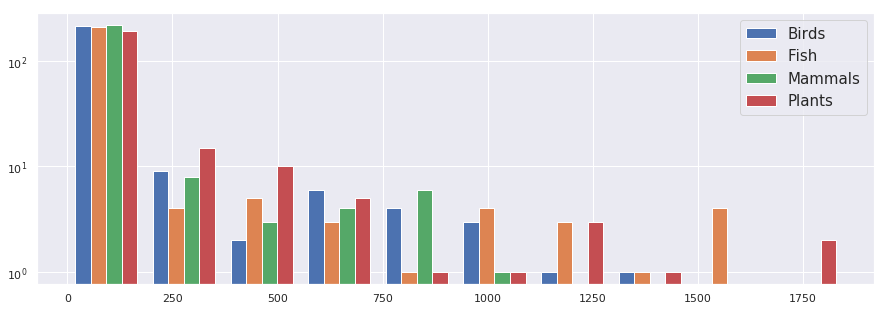

In [50]:
pertinent_indicators = pertinent_indicators[pertinent_indicators['Value']<1850]
plt.rcParams["figure.figsize"] = (15,5)
# Now we can look at some log scale
x = [species[1]['Value'] for species in threatened_species]
#colors=['#FF3b00', '#FFF082', '#00A6ED','#34BF28']
plt.hist(x, histtype='bar',bins=10, label=[species[0] for species in threatened_species])
plt.legend(prop={'size':15})
plt.yscale('log')


In [51]:
# Lets look at the countries with over 1000 threatened species of all kinds
rel_data[rel_data['Value']>1000][:10]

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5641837,East Asia & Pacific (all income levels),EAS,"Bird species, threatened",EN.BIR.THRD.NO,2015,1095.0
5641843,East Asia & Pacific (all income levels),EAS,"Fish species, threatened",EN.FSH.THRD.NO,2015,1430.0
5642014,Europe & Central Asia (all income levels),ECS,"Fish species, threatened",EN.FSH.THRD.NO,2015,1200.0
5642035,Europe & Central Asia (all income levels),ECS,"Plant species (higher), threatened",EN.HPT.THRD.NO,2015,1136.0
5642209,Fragile and conflict affected situations,FCS,"Plant species (higher), threatened",EN.HPT.THRD.NO,2015,1350.0
5642234,Heavily indebted poor countries (HIPC),HPC,"Fish species, threatened",EN.FSH.THRD.NO,2015,1622.0
5642279,High income,HIC,"Bird species, threatened",EN.BIR.THRD.NO,2015,1070.0
5642333,High income: nonOECD,NOC,"Fish species, threatened",EN.FSH.THRD.NO,2015,1104.0
5642354,High income: nonOECD,NOC,"Plant species (higher), threatened",EN.HPT.THRD.NO,2015,1153.0
5642380,High income: OECD,OEC,"Fish species, threatened",EN.FSH.THRD.NO,2015,1207.0


##### Looks like we still have some more erroneous country codes despite best efforts, so let's filter those out by using the country keys in the geojson file

In [52]:
# gather all of the country codes from the JSON file
dataset_codes = rel_data['CountryCode'].unique()
dataset_codes
import json
country_geo_codes = pd.read_json(country_geo, orient='columns')
country_geo_codes['features'][0]['id']
country_geo_codes = [feature['id'] for feature in country_geo_codes['features']]
print(len(country_geo_codes), len(dataset_codes))

177 242


In [53]:
cleaned_rel_data = rel_data[rel_data['CountryCode'].isin(country_geo_codes)]
print(len(cleaned_rel_data)/4, len(country_geo_codes))

164.0 177


#### It looks like we have more entries in the geojson data than we have in the cleaned_data, so lets add some dummy values to the dataset so we don't get display errors in the visualizations

In [54]:
# get the countries that are missing from the dataset to eliminate rendering errors
missing_countries = [country for country in country_geo_codes if country not in cleaned_rel_data['CountryCode']]
country_geo_codes = pd.DataFrame(country_geo_codes)
country_geo_codes.columns = ['CountryCode']
country_geo_codes
# get the country codes specifically
missing_codes = country_geo_codes[~country_geo_codes['CountryCode'].isin(rel_data['CountryCode'])]
missing_codes = pd.DataFrame(missing_codes[~missing_codes['CountryCode'].str.contains('-99')])
print(missing_codes)
# populate the missing codes with required dummy data
missing_codes['Value'] = 1
missing_codes['Year'] = 2015
missing_codes['IndicatorName'] = 'Bird Fish Mammal Plant'
antarctica = missing_codes['CountryCode'].str.contains('ATA')
cleaned_rel_data = pd.DataFrame(cleaned_rel_data.append(missing_codes, sort=True))

    CountryCode
6           ATA
7           ATF
33          COD
54          FLK
133         ROU
139         SDS
158         TLS
162         TWN
172         PSE


In [55]:
# Sanity check on reviewing the descriptive statistics
birds = pd.DataFrame(cleaned_rel_data[cleaned_rel_data['IndicatorName'].str.contains('Bird')])
fish = cleaned_rel_data[cleaned_rel_data['IndicatorName'].str.contains('Fish')]
mammals = cleaned_rel_data[cleaned_rel_data['IndicatorName'].str.contains('Mammal')]
plants = cleaned_rel_data[cleaned_rel_data['IndicatorName'].str.contains('Plant')]
threatened_species = [('Birds',birds),('Fish',fish),('Mammals',mammals),('Plants',plants)]
for species in threatened_species:
    print(f"Species: {species[0]}")
    print(species[1]['Year'].unique())
    print("Count:",len(species[1]))
    print(species[1]['Value'].describe(),'\n')

Species: Birds
[2015]
Count: 173
count    173.000000
mean      22.421965
std       24.491598
min        1.000000
25%       10.000000
50%       15.000000
75%       24.000000
max      165.000000
Name: Value, dtype: float64 

Species: Fish
[2015]
Count: 173
count    173.000000
mean      37.005780
std       39.016767
min        0.000000
25%       11.000000
50%       29.000000
75%       50.000000
max      247.000000
Name: Value, dtype: float64 

Species: Mammals
[2015]
Count: 173
count    173.000000
mean      17.664740
std       22.949712
min        0.000000
25%        6.000000
50%       10.000000
75%       20.000000
max      185.000000
Name: Value, dtype: float64 

Species: Plants
[2015]
Count: 173
count     173.000000
mean       80.924855
std       185.446821
min         0.000000
25%         4.000000
50%        18.000000
75%        71.000000
max      1848.000000
Name: Value, dtype: float64 



**These values looke a lot more reasonable, with Ecuador leading the number of threatened plant species significantly**

*Convenient plotting function for making the chloropleths*

In [66]:
### A convenient chloropleth plotting function
def plot_map(df,columns, species):    
    m = folium.Map(location=[39.4,8.22],zoom_start=1.5)
    
    folium.Choropleth(
        geo_data=country_geo,
        name='choropleth',
        data=df,
        columns=columns,
        key_on='feature.id',
        fill_color='YlOrBr',
        fill_opacity=.8,
        line_opacity=.3,
        legend_name=f"Number of endangered {species} species"
    ).add_to(m)
    folium.LayerControl().add_to(m)
    return m

In [67]:
# Create plots here to reduce clutter near maps
bird_map = plot_map(birds, ['CountryCode', 'Value'], 'bird')
mammal_map = plot_map(mammals, ['CountryCode', 'Value'], 'mammals')
plant_map = plot_map(plants, ['CountryCode', 'Value'], 'plants')
fish_map = plot_map(fish, ['CountryCode', 'Value'], 'fish')

# Visualization of Results
##### Note: The black areas have no data present in world indicators database

## Threatened Bird Species


In [68]:
bird_map

### Results
Based on the map we can clearly see that there is a high number of threatened bird species in Brazil, and the Pacific southeast area. Given the geographic sizes of the areas highlight above, and the fact that this metric is a raw count and not a normalized metric as the ratio of (count(species))/(sq. miles of country) we can't infer density directly, but if we were to analyze density of threatened species, it would certainly highlight extinction dangers in the Phillipines and Indonesia and slightly decrease significance of the findings in Brazil. On cursory inspection the Phillipines has the highest concentration of threatened bird species per land unit of any country described in this dataset.

# Threatened Mammals

In [69]:
mammal_map

#### Mammal Results
As with the Birds, we can see that Indonesia and the Phillipines have the highest concentrations of threatened species with Madagascar following closely. 

## Threatened Plant Species

In [70]:
plant_map

## Threatened Fish Species

In [72]:
fish_map

## Fish Results 
For fish, we can see that Turkey, India, and the US appear to have the most threatened species of fish